In [1]:
import matplotlib.pyplot as plt
import numpy as np

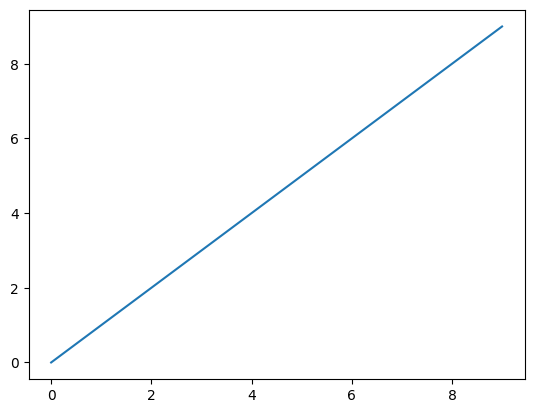

In [2]:
plt.plot(range(10))
plt.show()

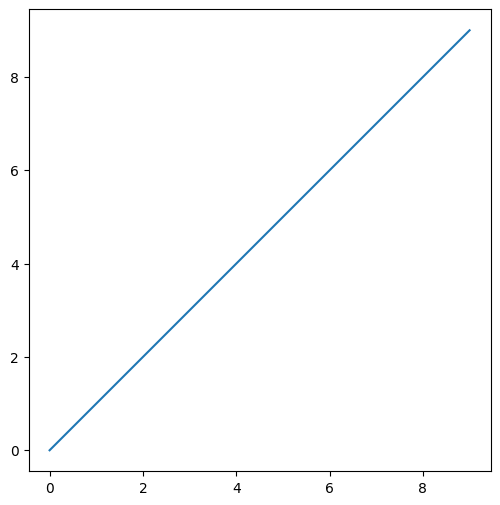

In [3]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(aspect=1)
ax.plot(range(10))
plt.show()

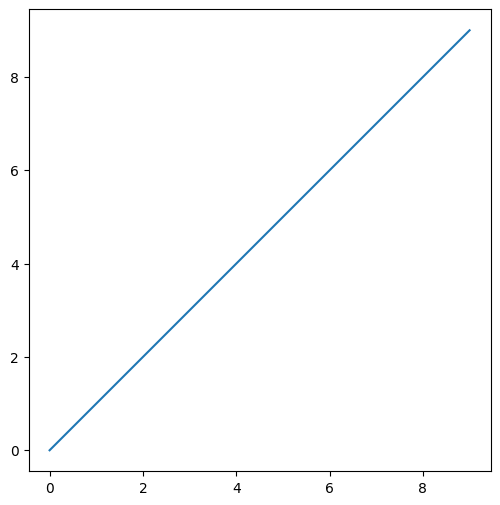

In [4]:
fig, ax = plt.subplots(figsize=(6,6), subplot_kw={"aspect":1})
ax.plot(range(10))

The use of plt.plot is actually a way to
tell matplotlib that we want to plot on the current axes, that is, the last
axes that has been created, implicitly or explicitly.

All the graphic primitives (i.e. artists) can be accessed and modified. In the figure
below, we modified the boldness of the X axis tick labels 

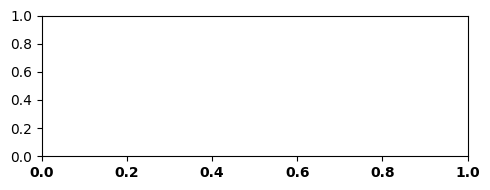

In [5]:
fig, ax = plt.subplots(figsize=(5, 2))
for label in ax.get_xaxis().get_ticklabels():
    label.set_fontweight("bold")

plt.tight_layout()

A backend is the combination of a renderer that is responsible for the
actual drawing and an optional user interface that allows to interact with
a figure. Until now, we’ve been using the default renderer and interface
resulting in a window being shown when the plt.show() method was
called. To know what is your default backend, you can type:

In [6]:
import matplotlib
print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline


In [ ]:
import matplotlib
matplotlib.use('webagg') # It has te be called BEFORE calling pyplot
import matplotlib.pyplot as plt
plt.show()

Once you’ve chosen an interactive backend, you can decide to produce a
figure in interactive mode (figure is updated after each matplotlib command):

In [ ]:
plt.ion() # Interactive mode on

In [ ]:
plt.plot([1,2,3]) # Plot is shown

In [ ]:
plt.xlabel("X Axis") # Label is updated
plt.ioff()

Dimensions and resolution:

In the first example of this chapter, we specified a figure size of (6,6)
that corresponds to a size of 6 inches (width) by 6 inches (height) using
a default dpi (dots per inch) of 100. When displayed on a screen, dots
corresponds to pixels and we can immediately deduce that the figure size
(i.e. window size without the toolbar) will be exactly 600×600 pixels.

In [10]:
fig = plt.figure(figsize=(6,6))
plt.savefig("./workspace/output.png")

In [11]:
!identify output.png

output.png PNG 600x600 600x600+0+0 8-bit sRGB 2877B 0.000u 0:00.000


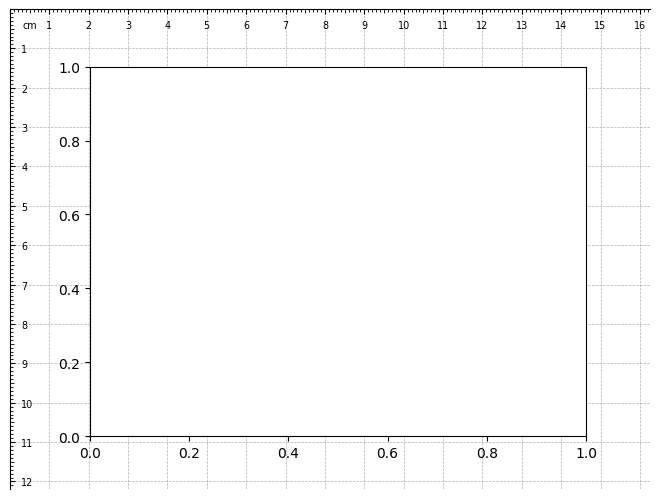

In [1]:
import matplotlib.ticker as ticker

class Ruler:
    """ Ruler add a whole figure axis whose ticks indicate figure
        dimensions and adapt itself to figure resize event.
    """

    def __init__(self, fig=None):
        self.fig = fig or plt.gcf()
        self.ax = None
        self.show()

    def show(self):

        if self.ax is None:
            ax = self.fig.add_axes([0, 0, 1, 1], zorder=-10, facecolor="None")
            ax.spines["right"].set_visible(False)
            ax.spines["bottom"].set_visible(False)

            ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
            ax.tick_params(
                axis="x", which="both", labelsize="x-small", direction="in", pad=-15
            )
            ax.xaxis.tick_top()

            ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
            ax.yaxis.tick_left()
            ax.tick_params(
                axis="y", which="both", labelsize="x-small", direction="in", pad=-8
            )
            ax.yaxis.tick_left()
            for label in ax.yaxis.get_ticklabels():
                label.set_horizontalalignment("left")

            self.text = ax.text(
                0.5, 0.4, "cm", ha="center", va="center", size="x-small"
            )
            ax.grid(linestyle="--", linewidth=0.5)

            self.ax = ax

        self.update()
        plt.connect("resize_event", self.update)

    def update(self, *args):

        inch = 2.54
        width_cm = self.fig.get_figwidth() * inch
        height_cm = self.fig.get_figheight() * inch

        n = int(width_cm) + 1
        self.ax.set_xlim(0, width_cm)
        self.ax.set_xticks(np.arange(n))
        self.ax.set_xticklabels([""] + ["%d" % x for x in np.arange(1, n)])

        markersize = self.ax.xaxis.get_ticklines(True)[0].get_markersize()
        for line in self.ax.xaxis.get_ticklines(True)[2::9]:
            line.set_markersize(1.5 * markersize)

        n = int(height_cm) + 1
        self.ax.set_ylim(height_cm, 0)
        self.ax.set_yticks(np.arange(n))
        self.ax.set_yticklabels([""] + ["%d" % y for y in np.arange(1, n)])

        markersize = self.ax.yaxis.get_ticklines(True)[0].get_markersize()
        for line in self.ax.yaxis.get_ticklines(True)[1::9]:
            line.set_markersize(1.5 * markersize)


import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ruler = Ruler(fig)
plt.show()

Exercise 1 Try to produce a figure with a given (and exact) pixel size (e.g.
512x512 pixels). How would you specify the size and save the figure?

In [2]:
fig = plt.figure(figsize=(5.12,5.12))
plt.savefig("output.png")

<Figure size 512x512 with 0 Axes>

In [3]:
!identify output.png

output.png PNG 512x512 512x512+0+0 8-bit sRGB 2288B 0.000u 0:00.000


In [4]:
fig = plt.figure(figsize=(512,512), dpi=1)
plt.savefig("output.png")

<Figure size 512x512 with 0 Axes>

In [5]:
!identify output.png

output.png PNG 512x512 512x512+0+0 8-bit sRGB 2288B 0.000u 0:00.000


Exercise 2 The goal is to make the figure 1.9 that shows a dual axis, one
in inches and one in centimeters. The difficulty is that we want the centimeters
and inched to be physically correct when printed. This requires
some simple computations for finding the right size and some trials and
errors to make the actual figure. Don’t pay too much attention to all the
details, the essential part is to get the size right.

![](./images/exercise2.png)